Les images utilisées dans les exemples sont sur github ici : https://github.com/opencv/opencv/tree/4.x/samples/data

# [**Détection et description de caractéristiques**](https://docs.opencv.org/3.4/db/d27/tutorial_py_table_of_contents_feature2d.html)

1. [**Comprendre les caractéristiques**](https://docs.opencv.org/3.4/df/d54/tutorial_py_features_meaning.html) *Quelles sont les principales caractéristiques d'une image ? Comment la découverte de ces caractéristiques peut-elle nous être utile ?*

2. [**Détection de coin Harris**](https://docs.opencv.org/3.4/dc/d0d/tutorial_py_features_harris.html) *Bon, les coins sont de bonnes caractéristiques ? Mais comment les trouver ?*

3. [**Détecteur de coin Shi-Tomasi et bonnes caractéristiques à suivre**](https://docs.opencv.org/3.4/d4/d8c/tutorial_py_shi_tomasi.html) *Nous allons examiner la détection de coin Shi-Tomasi.*


4. [**Introduction à SIFT (Transformée de caractéristiques invariantes à l'échelle)**](https://docs.opencv.org/3.4/da/df5/tutorial_py_sift_intro.html) *Le détecteur de coin Harris n'est pas assez bon lorsque l'échelle de l'image change. Lowe a développé une méthode de rupture pour trouver des caractéristiques invariantes à l'échelle appelée SIFT.*

5. [**Introduction à SURF (Caractéristiques robustes accélérées)**](https://docs.opencv.org/3.4/df/dd2/tutorial_py_surf_intro.html) *SIFT est vraiment bon, mais pas assez rapide, donc les gens ont trouvé une version accélérée appelée SURF.*

6. [**Algorithme FAST pour la détection de coin**](https://docs.opencv.org/3.4/df/d0c/tutorial_py_fast.html) *Toutes les méthodes de détection de caractéristiques ci-dessus sont bonnes d'une certaine manière. Mais ils ne sont pas assez rapides pour fonctionner dans les applications en temps réel comme SLAM. Vient l'algorithme FAST, qui est vraiment "RAPIDE".*

7. [**BRIEF (Caractéristiques élémentaires indépendantes robustes binaires)**](https://docs.opencv.org/3.4/dc/d7d/tutorial_py_brief.html) *SIFT utilise un descripteur de caractéristiques avec 128 nombres à virgule flottante. Considérez des milliers de telles caractéristiques. Cela prend beaucoup de mémoire et plus de temps pour faire correspondre. Nous pouvons le compresser pour le rendre plus rapide. Mais nous devons toujours le calculer en premier. Vient BRIEF qui donne le raccourci pour trouver des descripteurs binaires avec moins de mémoire, un matching plus rapide, toujours un taux de reconnaissance plus élevé.*

8. [**ORB (Oriented FAST et Rotated BRIEF)**](https://docs.opencv.org/3.4/dc/d7d/tutorial_py_brief.html) *SIFT et SURF sont bons dans ce qu'ils font, mais que se passe-t-il si vous devez payer quelques dollars chaque année pour les utiliser dans vos applications ? Ouais, ils sont brevetés !!! Pour résoudre ce problème, les développeurs OpenCV ont créé une nouvelle alternative "GRATUITE" à SIFT & SURF, et c'est ORB.*

9. [**Correspondance de caractéristiques**](https://docs.opencv.org/3.4/dc/dc3/tutorial_py_matcher.html) *Nous connaissons beaucoup de choses sur les détecteurs et les descripteurs de caractéristiques. Il est temps d'apprendre à faire correspondre différents descripteurs. OpenCV propose deux techniques de correspondance de caractéristiques : le matcheur de force brute et le matcheur basé sur FLANN.*

10. [**Correspondance de caractéristiques + Homographie pour trouver des objets**](https://docs.opencv.org/3.4/d1/de0/tutorial_py_feature_homography.html) *Maintenant que nous connaissons la correspondance de caractéristiques, mélangeons-la avec le module calib3d pour trouver des objets dans une image complexe.*

# 1. [Comprendre les **caractéristiques**](https://docs.opencv.org/3.4/df/d54/tutorial_py_features_meaning.html)

Dans ce chapitre, nous allons simplement essayer de comprendre ce que sont les caractéristiques, pourquoi sont-elles importantes, pourquoi les coins sont-ils importants, etc.

## Explication

La plupart d'entre vous auront joué aux jeux de puzzle. Vous obtenez beaucoup de petits morceaux d'une image, où vous devez les assembler correctement pour former une grande image réelle. **La question est, comment faites-vous ?** Qu'en est-il de la projection de la même théorie sur un programme informatique afin que l'ordinateur puisse jouer à des puzzles ? Si l'ordinateur peut jouer à des puzzles, pourquoi ne pouvons-nous pas donner beaucoup d'images réelles d'un bon paysage naturel à l'ordinateur et lui dire d'assembler toutes ces images en une seule grande image ? Si l'ordinateur peut assembler plusieurs images naturelles en une seule, que diriez-vous de donner beaucoup d'images d'un bâtiment ou de n'importe quelle structure et de dire à l'ordinateur d'en créer un modèle 3D ?

Eh bien, les questions et les imaginations continuent. Mais tout dépend de la question la plus basique : Comment jouez-vous aux puzzles ? Comment organisez-vous beaucoup de morceaux d'image brouillés en une seule grande image ? Comment pouvez-vous assembler beaucoup d'images naturelles en une seule image ?

La réponse est que nous recherchons des modèles spécifiques ou des caractéristiques spécifiques qui sont uniques, et peuvent être facilement identifiées et facilement comparés. Si nous optons pour une définition d'une telle caractéristique, nous pouvons avoir du mal à l'exprimer avec des mots, mais nous savons ce qu'elles sont. Si quelqu'un vous demande de signaler une bonne caractéristiques qui peut être comparée sur plusieurs images, vous pouvez en signaler une. C'est pourquoi même les petits enfants peuvent simplement jouer à ces jeux. Nous recherchons ces caractéristiques dans une image, les trouvons, recherchons les mêmes caractéristiques dans d'autres images et les alignons. C'est ça. (Dans le puzzle, nous nous intéressons davantage à la continuité des différentes images). Toutes ces capacités sont présentes en nous de façon inhérente.

Ainsi, notre seule question de base s'étend à plus en nombre, mais devient plus spécifique. **Quelles sont ces caractéristiques ?**. (La réponse devrait également être compréhensible pour un ordinateur.)

Il est difficile de dire comment les humains trouvent ces caractéristiques. Ceci est déjà programmé dans notre cerveau. Mais si nous examinons en profondeur certaines images et recherchons différents modèles, nous trouverons quelque chose d'intéressant. Par exemple, prenez l'image ci-dessous :

<img src="https://docs.opencv.org/3.4/feature_building.jpg" alt="feature_building.jpg"/>

L'image est très simple. En haut de l'image, six petits patchs d'image sont donnés. La question pour vous est de trouver l'emplacement exact de ces patchs dans l'image originale. Combien de résultats corrects pouvez-vous trouver ?

A et B sont des surfaces planes et elles sont réparties sur une grande surface. Il est difficile de trouver l'emplacement exact de ces patchs.

C et D sont beaucoup plus simples. Ce sont les bords du bâtiment. Vous pouvez trouver un emplacement approximatif, mais l'emplacement exact est encore difficile. C'est parce que le motif est le même partout le long du bord. Au bord, cependant, c'est différent. Un bord est donc une meilleure caractéristiques par rapport à une zone plate, mais pas assez bonne (c'est bon dans un puzzle pour comparer la continuité des bords).

Enfin, E et F sont quelques coins du bâtiment. Et ils peuvent être facilement trouvés. Parce que dans les coins, où que vous déplaciez ce patch, il aura un aspect différent. Ils peuvent donc être considérés comme de bonnes caractéristiques. Alors maintenant, nous passons à une image plus simple (et largement utilisée) pour une meilleure compréhension.

<img src="https://docs.opencv.org/3.4/feature_simple.png" alt="feature_simple.png"/>

Tout comme ci-dessus, le patch bleu est une zone plate et difficile à trouver et à suivre. Où que vous déplaciez le patch bleu, il a le même aspect. La tache noire a un bord. Si vous le déplacez dans le sens vertical (c'est-à-dire le long du dégradé), il change. Déplacé le long du bord (parallèle au bord), il a le même aspect. Et pour la tache rouge, c'est un coin. Où que vous déplaciez le patch, il a un aspect différent, ce qui signifie qu'il est unique. Donc, fondamentalement, les coins sont considérés comme de bons éléments dans une image. (Pas seulement les coins, dans certains cas, les taches sont considérées comme de bonnes caractéristiques).

Nous avons  à présent répondu à notre question, "quelles sont ces caractéristiques ?". Mais la question suivante se pose. Comment les trouve-t-on ? Ou comment trouvons-nous les coins ?. Nous avons répondu cela de manière intuitive, c'est-à-dire rechercher les régions des images qui présentent une variation maximale lorsqu'elles sont déplacées (d'une petite quantité) dans toutes les régions qui les entourent. Cela sera projeté en langage informatique dans les chapitres suivants. Donc, trouver ces caractéristiques d'image s'appelle la détection de caractéristiques.

Nous avons trouvé les caractéristiques dans les images. Une fois que vous l'avez trouvé, vous devriez pouvoir trouver le même dans les autres images. Comment est-ce fait ? Nous prenons une région autour de l'élément, nous l'expliquons dans nos propres mots, comme "la partie supérieure est le ciel bleu, la partie inférieure est la région d'un bâtiment, sur ce bâtiment il y a du verre, etc." et vous recherchez la même zone dans l'autre images. Fondamentalement, vous décrivez la caractéristique. De même, un ordinateur doit également décrire la région autour de l'élément afin qu'il puisse le trouver dans d'autres images. La soi-disant description s'appelle **Description de la caractéristique**. Une fois que vous avez les caractéristiques et leur description, vous pouvez trouver les mêmes caractéristiques dans toutes les images et les aligner, les assembler ou faire ce que vous voulez.

Donc, dans ce module, nous examinons différents algorithmes dans OpenCV pour trouver des caractéristiques, les décrire, les faire correspondre, etc.

# 2. [Détection d'angle de **Harris**](https://docs.opencv.org/3.4/dc/d0d/tutorial_py_features_harris.html)

## Objectif

Dans ce chapitre,
* Nous comprendrons les concepts derrière Harris Corner Detection (HCD).
* Nous verrons les fonctions suivantes : `cv.cornerHarris()`, `cv.cornerSubPix()`

## Théorie

Dans le dernier chapitre, nous avons vu que les coins sont des régions de l'image avec une grande variation d'intensité dans toutes les directions. Une des premières tentatives pour trouver ces coins a été faite par **Chris Harris & Mike Stephens** dans leur article [**A Combined Corner and Edge Detector**](https://www.semanticscholar.org/paper/A-Combined-Corner-and-Edge-Detector-Harris-Stephens/6818668fb895d95861a2eb9673ddc3a41e27b3b3) en 1988, il s'appelle maintenant Harris Corner Detector. Il a pris cette idée simple sous une forme mathématique. Il trouve essentiellement la différence d'intensité pour un déplacement de $(u, v)$ dans toutes les directions. Celle-ci s'exprime comme ci-dessous :

$$E(u,v) = \sum_{x,y} \underbrace{w(x,y)}_\text{window function} \, [\underbrace{I(x+u,y+v)}_\text{shifted intensity}-\underbrace{I(x,y)}_\text{intensity}]^2$$

La fonction de fenêtre est soit une fenêtre rectangulaire, soit une fenêtre gaussienne qui donne des poids aux pixels situés en dessous.

Nous devons maximiser cette fonction $E(u, v)$ pour la détection des coins. Cela signifie que nous devons maximiser le second terme. En appliquant le développement de Taylor à l'équation ci-dessus et en utilisant quelques étapes mathématiques (veuillez vous référer à tous les manuels standards que vous aimez pour une dérivation complète), nous obtenons l'équation finale comme suit :

$$
E(u,v) \approx \begin{bmatrix} u & v \end{bmatrix} M \begin{bmatrix} u \\ v \end{bmatrix}
$$

Où :

$$
M = \sum_{x,y} w(x,y) \begin{bmatrix}I_x I_x & I_x I_y \\ I_x I_y & I_y I_y \end{bmatrix}
$$

Ici, $I_x$ et $I_y$ sont des dérivées d'image dans les directions $x$ et $y$ respectivement. (Ceux-ci peuvent être facilement trouvés en utilisant `cv.Sobel()`).

Vient ensuite l'essentiel. Après cela, ils ont créé un score, essentiellement une équation, qui détermine si une fenêtre peut contenir un coin ou non.

$$
R = \det(M) - k(\operatorname{tr}(M))^2
$$

où
* $\det(M) = \lambda_1 \lambda_2$
* $\operatorname{tr}(M) = \lambda_1 + \lambda_2$
* $\lambda_1$ et $\lambda_2$ sont les valeurs propres de $M$.

Ainsi, les grandeurs de ces valeurs propres décident si une région est un coin, un bord ou plate.
* Quand $|R|$ est petit, ce qui arrive lorsque $\lambda_1$ et $\lambda_2$ sont petits, la région est plate.
* Lorsque $R < 0$, ce qui se produit lorsque $\lambda_1 >> \lambda_2$ ou vice versa, la région est un bord.
* Lorsque $R$ est grand, ce qui arrive lorsque $\lambda_1$ et $\lambda_2$ sont grands et $\lambda_1 \sim \lambda_2$, la région est un coin.

Cela peut être représenté dans une belle image comme suit :

<img src="https://docs.opencv.org/3.4/harris_region.jpg" alt="harris_region.jpg"/>

Ainsi, le résultat de Harris Corner Detection est une image en niveaux de gris avec ces scores. Le seuillage pour un score approprié vous donne les coins de l'image. Nous allons le faire avec une simple image.


## Détecteur de coin Harris dans OpenCV

OpenCV a la fonction **`cv.cornerHarris()`** à cet effet. Ses arguments sont :
* **`img`** - Image d'entrée. Il doit être en niveaux de gris et de type `float32`.
* **`blockSize`** - C'est la taille du voisinage considéré pour la détection de coin
* **`ksize`** - Paramètre d'ouverture de la dérivée de Sobel utilisée.
* **`k`** - Paramètre libre du détecteur de Harris dans l'équation.

Voir l'exemple ci-dessous :

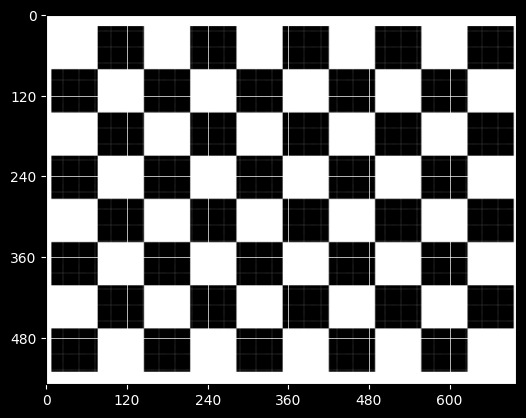

In [2]:
import numpy as np
import cv2 as cv

filename = 'img/chessboard.png'
img = cv.imread(filename)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

from img_processing import new_show_imx
new_show_imx(gray)

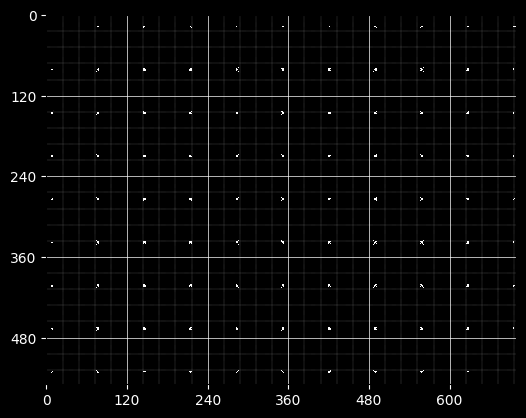

In [3]:
gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)
new_show_imx(dst)

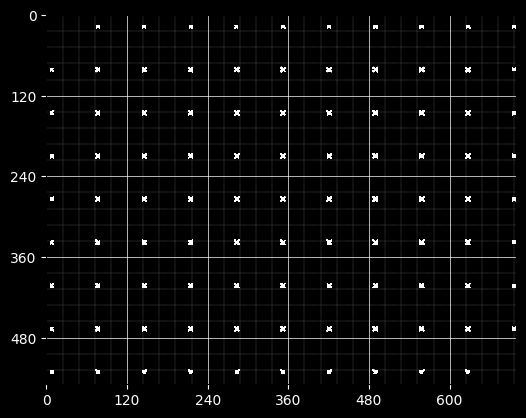

In [4]:
# result is dilated for marking the corners, not important
dst = cv.dilate(dst, None)

new_show_imx(dst)

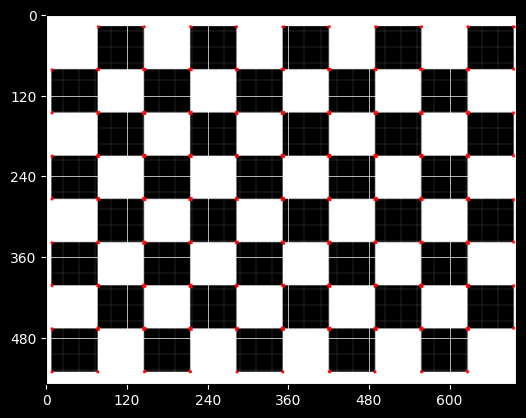

In [5]:
# Threshold for an optimal value, it may vary depending on the image.
img[dst > 0.01 * dst.max()] = [255, 0, 0]

new_show_imx(img)

In [7]:
# A ne pas exécuter :
cv.imshow('dst', img)
if cv.waitKey(0) & 0xff == 27:
    cv.destroyAllWindows()

Ci-après les trois résultats attendus :

<img src="https://docs.opencv.org/3.4/harris_result.jpg" alt="harris_result.jpg"/>


## Coin avec précision sous-pixel

Parfois, vous devrez peut-être trouver les coins avec une précision maximale. OpenCV est livré avec une fonction [**`cv.cornerSubPix()`**](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga354e0d7c86d0d9da75de9b9701a9a87e) qui affine davantage les coins détectés avec une précision inférieure au pixel. Ci-dessous un exemple. Comme d'habitude, nous devons d'abord trouver les coins Harris. Puis on passe les barycentres de ces coins (Il peut y avoir un tas de pixels à un coin, on prend leur barycentre) pour les affiner. Les coins Harris sont marqués en pixels rouges et les coins raffinés sont marqués en pixels verts. Pour cette fonction, nous devons définir les critères d'arrêt de l'itération. Nous l'arrêtons après un nombre spécifié d'itérations ou une certaine précision est atteinte, selon la première éventualité. Nous devons également définir la taille du quartier dans lequel il recherche les coins.

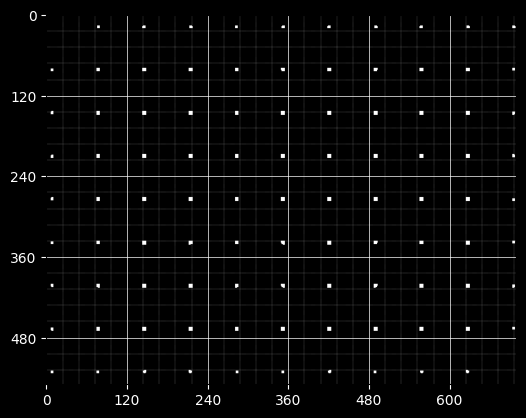

In [7]:
import numpy as np
import cv2 as cv

filename = 'img/chessboard.png'  # 'chessboard2.jpg'
img = cv.imread(filename)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# find Harris corners
gray = np.float32(gray)
dst = cv.cornerHarris(gray, 2, 3, 0.04)
dst = cv.dilate(dst, None)
ret, dst = cv.threshold(dst, 0.01 * dst.max(), 255, 0)
dst = np.uint8(dst)

from img_processing import new_show_imx
new_show_imx(dst)

ret : 98
(98, 5) [[     0      0    700    550 382304]
 [    76     17      4      4     16]
 [   143     17      5      4     19]
 [   213     17      5      4     19]
 [   281     17      4      4     16]
 [   350     17      5      4     19]
 [   418     17      5      4     19]
 [   488     17      5      4     19]
 [   555     17      5      4     19]
 [   625     17      5      4     19]]
(98, 2) [[349.44780332 274.48046842]
 [ 77.5         18.5       ]
 [145.10526316  18.57894737]
 [214.89473684  18.57894737]
 [282.5         18.5       ]
 [352.10526316  18.57894737]
 [420.10526316  18.57894737]
 [489.89473684  18.57894737]
 [557.10526316  18.57894737]
 [626.89473684  18.57894737]]


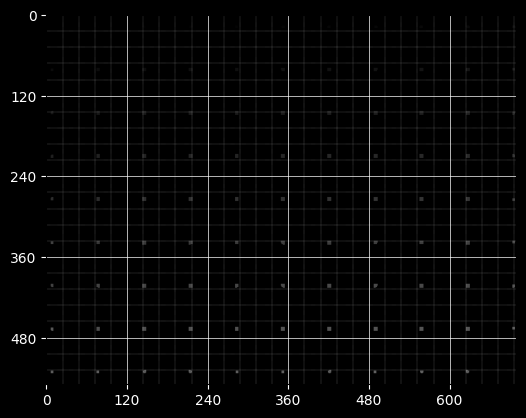

In [14]:
# find centroids
ret, labels, stats, centroids = cv.connectedComponentsWithStats(dst)
print("ret :", ret)
new_show_imx(labels)
print(stats.shape, stats[:10])
print(centroids.shape, centroids[:10])

"""
Cf. : https://stackoverflow.com/questions/35854197/how-to-use-opencvs-connectedcomponentswithstats-in-python
Labels is a matrix the size of the input image where each element has a value equal to its label.

Stats is a matrix of the stats that the function calculates.
It has a length equal to the number of labels and a width equal to the number of stats.
It can be used with the OpenCV documentation for it:

    Statistics output for each label, including the background label,
    see below for available statistics. Statistics are accessed via stats[label, COLUMN]
    where available columns are defined below.

        cv2.CC_STAT_LEFT The leftmost (x) coordinate which is the inclusive start of the bounding box in the horizontal direction.
        cv2.CC_STAT_TOP The topmost (y) coordinate which is the inclusive start of the bounding box in the vertical direction.
        cv2.CC_STAT_WIDTH The horizontal size of the bounding box
        cv2.CC_STAT_HEIGHT The vertical size of the bounding box
        cv2.CC_STAT_AREA The total area (in pixels) of the connected component

Centroids is a matrix with the x and y locations of each centroid.
The row in this matrix corresponds to the label number.
"""

In [17]:
# define the criteria to stop and refine the corners
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 100, 0.001)
corners = cv.cornerSubPix(gray,np.float32(centroids), (5, 5), (-1, -1), criteria)

display(corners.shape, corners[:10])

(98, 2)

array([[351.30692 , 274.2459  ],
       [ 76.44836 ,  17.555292],
       [145.0648  ,  17.565907],
       [213.86284 ,  17.570513],
       [282.4708  ,  17.563475],
       [351.3827  ,  17.55389 ],
       [419.81946 ,  17.563929],
       [488.6836  ,  17.570435],
       [557.22577 ,  17.56958 ],
       [626.0602  ,  17.567907]], dtype=float32)

In [18]:
# Now draw them
res = np.hstack((centroids, corners))
res = np.int0(res)

print(res.shape, res[:10])


(98, 4) [[349 274 351 274]
 [ 77  18  76  17]
 [145  18 145  17]
 [214  18 213  17]
 [282  18 282  17]
 [352  18 351  17]
 [420  18 419  17]
 [489  18 488  17]
 [557  18 557  17]
 [626  18 626  17]]


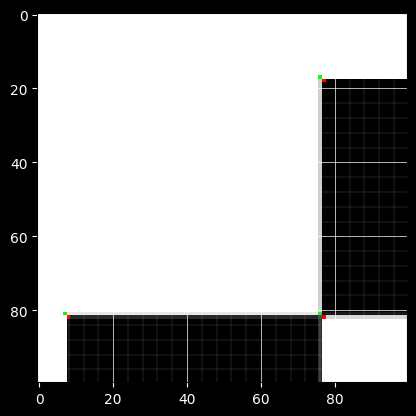

In [21]:
img[res[:, 1], res[:, 0]] = [255, 0, 0]
img[res[:, 3], res[:, 2]] = [0, 255, 0]

new_show_imx(img[:100, :100])

In [22]:
cv.imwrite('img/subpixel5.png', img)

True

Voici le résultat ci-dessous, où certains emplacements importants sont affichés dans la fenêtre agrandie pour visualiser :

<img src="https://docs.opencv.org/3.4/subpixel3.png" alt="subpixel3.png"/>

# 3. [Détecteur de coin **Shi-Tomasi** et bonnes caractéristiques à suivre](https://docs.opencv.org/3.4/d4/d8c/tutorial_py_shi_tomasi.html)

## Objectif

Dans ce chapitre,
* Nous allons en apprendre davantage sur l'autre détecteur de coin : Shi-Tomasi Corner Detector
* Nous allons voir la fonction : [**`cv.goodFeaturesToTrack()`**](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga1d6bb77486c8f92d79c8793ad995d541)

## Théorie

Dans le dernier chapitre, nous avons vu Harris Corner Detector. Plus tard en 1994, J. Shi et C. Tomasi y ont apporté une petite modification dans leur article [Good Features to Track](https://www.semanticscholar.org/paper/Good-features-to-track-Shi-Tomasi/2ab46391005cea85fa5c204b6e77a9c870fdbaed) qui montre de meilleurs résultats par rapport à Harris Corner Detector. La fonction de notation dans Harris Corner Detector était donnée par :

$$
R = \lambda_1 \lambda_2 - k(\lambda_1+\lambda_2)^2
$$

Au lieu de cela, Shi-Tomasi ont proposé :

$$
R = \min(\lambda_1, \lambda_2)
$$

S'il est supérieur à une valeur de seuil, il est considéré comme un coin. Si nous le traçons dans l'espace $\lambda_1 - \lambda_2$ comme nous l'avons fait dans Harris Corner Detector, nous obtenons une image comme ci-dessous :

<img src="https://docs.opencv.org/3.4/shitomasi_space.png" alt="shitomasi_space.png"/>

Sur la figure, vous pouvez voir que ce n'est que lorsque $\lambda_1$ et $\lambda_2$ sont au-dessus d'une valeur minimale, $\lambda_{\min}$, qu'il est considéré comme un coin (région verte).

## Code

OpenCV a une fonction, [**`cv.goodFeaturesToTrack()`**](https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga1d6bb77486c8f92d79c8793ad995d541). Il trouve N coins les plus forts dans l'image par la méthode Shi-Tomasi (ou Harris Corner Detection, si vous le spécifiez). Comme d'habitude, l'image doit être une image en niveaux de gris. Ensuite, vous spécifiez le nombre de coins que vous souhaitez trouver. Ensuite, vous spécifiez le niveau de qualité, qui est une valeur comprise entre 0 et 1, qui désigne la qualité minimale du coin en dessous de laquelle tout le monde est rejeté. Ensuite, nous fournissons la distance euclidienne minimale entre les coins détectés.

Avec toutes ces informations, la fonction trouve les coins de l'image. Tous les coins inférieurs au niveau de qualité sont rejetés. Ensuite, il trie les coins restants en fonction de la qualité dans l'ordre décroissant. Ensuite, la fonction prend le premier coin le plus fort, rejette tous les coins proches dans la plage de distance minimale et renvoie N coins les plus forts.

Dans l'exemple ci-dessous, nous allons essayer de trouver les 25 meilleurs coins :

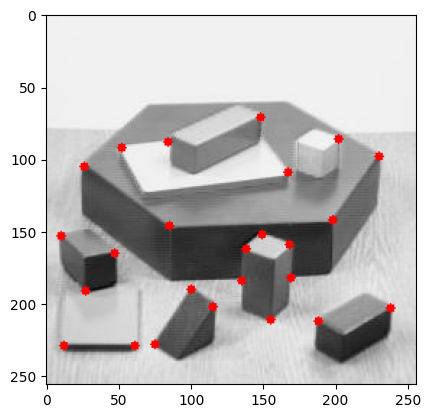

(<matplotlib.image.AxesImage at 0x1ecdb5c6b30>, None)

In [23]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('img/blox.jpg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
corners = cv.goodFeaturesToTrack(gray, 25, 0.01, 10)
corners = np.int0(corners)
for i in corners:
    x, y = i.ravel()
    cv.circle(img, (x, y), 3, 255, -1)
plt.imshow(img), plt.show()

Cette fonction est plus appropriée pour l'identification. Nous verrons cela le moment venu.

# 4. [Introduction à **SIFT** (Transformée Invariante des Caractéristiques d'Echelle)](https://docs.opencv.org/3.4/da/df5/tutorial_py_sift_intro.html)

## Objectif

Dans ce chapitre,
* Nous allons apprendre les concepts de l'algorithme SIFT
* Nous allons apprendre à trouver les points clés SIFT et les descripteurs.

## Théorie

Au cours des derniers chapitres, nous avons vu certains détecteurs de coins tels que Harris, etc. Ils sont invariants à la rotation, ce qui signifie que même si l'image est tournée, nous pouvons trouver les mêmes coins. C'est évident car les coins restent des coins dans une image tournée. Mais qu'en est-il de la mise à l'échelle ? Un coin peut ne pas être un coin si l'image est mise à l'échelle. Par exemple, vérifiez une image simple ci-dessous. Un coin dans une petite image dans une petite fenêtre est plat lorsqu'il est zoomé dans la même fenêtre. Ainsi, Harris corner n'est pas invariant à l'échelle.

<img src="https://docs.opencv.org/3.4/sift_scale_invariant.jpg" alt="sift_scale_invariant.jpg"/>

En 2004, **D.Lowe** de l'Université de la Colombie-Britannique a conçu un nouvel algorithme, la transformation de caractéristiques invariantes à l'échelle (SIFT) dans son papier, ["Distinctive Image Features from Scale-Invariant Keypoints"](https://www.cs.ubc.ca/~lowe/papers/ijcv04.pdf), qui extrait des points clés et calcule leurs descripteurs. (Ce papier est facile à comprendre et est considéré comme le meilleur matériel disponible sur SIFT. Cette explication n'en est qu'un bref résumé de ce papier).

Il y a principalement quatre étapes impliquées dans l'algorithme SIFT. Nous les verrons une par une.

### 1. Détection d'extrêmes dans l'espace d'échelle

A partir de l'image ci-dessus, il est évident que nous ne pouvons pas utiliser la même fenêtre pour détecter des points clés de différentes échelles. Cela va bien avec un petit coin. Mais pour détecter des coins plus grands, nous avons besoin de fenêtres plus grandes. Pour cela, on utilise un filtrage dans l'espace d'échelle. Dans celui-ci, on trouve le Laplacien de Gauss pour l'image avec différentes valeurs de $\sigma$. LoG agit en tant que détecteur de taches qui détecte des taches de différentes tailles en raison du changement de $\sigma$. En résumé, $\sigma$ agit en tant que paramètre d'échelle. Par exemple, dans l'image ci-dessus, le noyau gaussien avec un faible σ$\sigma$ donne une valeur élevée pour un petit coin tandis que le noyau gaussien avec une $\sigma$ élevée convient bien pour un coin plus grand. Nous pouvons donc trouver les maxima locaux à travers l'échelle et l'espace qui nous donne une liste de valeurs $(x, y, \sigma)$ qui signifie qu'il y a un point clé potentiel à $(x, y)$ à l'échelle $\sigma$.

Mais ce LoG est un peu coûteux, alors l'algorithme SIFT utilise la Différence de Gaussiens qui est une approximation de LoG. La Différence de Gaussienne est obtenue comme la différence du flou gaussien d'une image avec deux $\sigma$ différentes, appelé $\sigma$ et $k\sigma$. Ce processus est effectué pour différentes octaves de l'image dans la pyramide gaussienne. Il est représenté dans l'image ci-dessous:

<img src="https://docs.opencv.org/3.4/sift_dog.jpg" alt="sift_dog.jpg"/>
​

## 2. Localisation de points clés

Une fois les emplacements potentiels de points clés trouvés, ils doivent être affinés pour obtenir des résultats plus précis. Ils ont utilisé l'expansion de la série de Taylor de l'espace-échelle pour obtenir une localisation plus précise des extrêmes, et si l'intensité à cet extrême est inférieure à une valeur seuil (0,03 selon le papier), il est rejeté. Ce seuil est appelé `contrastThreshold` dans OpenCV.

Le DOG a une réponse plus élevée pour les bords, il est donc nécessaire de les supprimer. Pour cela, on utilise un concept similaire au détecteur de coins Harris. Ils utilisent une matrice Hessienne 2x2 (H) pour calculer la courbure principale. Nous savons du détecteur de coins Harris que pour les bords, une valeur propre est plus grande que l'autre. Ici, ils utilisent une fonction simple :

Si ce rapport est supérieur à un seuil appelé `edgeThreshold` dans OpenCV, ce point clé est rejeté. Il est donné comme 10 dans le papier.

Cela élimine tous les points clés à faible contraste et les points clés de bords et ce qui reste sont des points d'intérêt forts.


## 3. Attribution de l'orientation

Maintenant, une orientation est assignée à chaque point clé pour obtenir une invariance par rapport à la rotation de l'image. On prend un voisinage autour de l'emplacement du point clé en fonction de l'échelle, et on calcule la magnitude et la direction du gradient dans cette région. Un histogramme d'orientation avec 36 bacs couvrant 360 degrés est créé (il est pondéré par la magnitude du gradient et par une fenêtre circulaire pondérée par une gaussienne avec $\sigma$ égal à 1,5 fois l'échelle du point clé). On prend le pic le plus élevé de l'histogramme et tout pic supérieur à 80% de celui-ci est également considéré pour calculer l'orientation. Il crée des points clés avec la même emplacement et échelle, mais différentes directions. Cela contribue à la stabilité de l'appariement.

## 4. Descripteur de point clé

Maintenant, on crée un descripteur de point clé. On prend un voisinage de 16x16 autour du point clé. Il est divisé en 16 sous-blocs de taille 4x4. Pour chaque sous-bloc, un histogramme d'orientation à 8 bacs est créé. Il y a donc un total de 128 valeurs de bac disponibles. Il est représenté sous forme de vecteur pour former le descripteur de point clé. En plus de cela, plusieurs mesures sont prises pour obtenir une robustesse face aux changements d'éclairage, rotation, etc.

## 5. Appariement des points clés

Lors de la correspondance de points clés entre deux images, le plus proche voisin est identifié. Cependant, dans certains cas, le second correspondant le plus proche peut être très proche du premier en raison du bruit ou d'autres raisons. Dans ce cas, le rapport de la distance la plus proche à la seconde distance la plus proche est pris. Si ce rapport est supérieur à 0.8, ils sont rejetés. Cela élimine environ 90% des correspondances fausses tout en ne perdant que 5% de correspondances correctes, selon le papier.

Ceci est un résumé de l'algorithme SIFT. Pour plus de détails et de compréhension, la lecture du papier original est fortement recommandée.

## SIFT dans OpenCV

Maintenant, examinons les fonctionnalités SIFT disponibles dans OpenCV. Notez que précédemment, elles n'étaient disponibles que dans le référentiel opencv contrib, mais le brevet a expiré en 2020. Ils sont donc maintenant inclus dans le référentiel principal. Commençons par la détection de points clés et leur représentation graphique. Tout d'abord, nous devons construire un objet SIFT. Nous pouvons lui passer des paramètres différents qui sont optionnels et bien expliqués dans les documents.

In [25]:
import numpy as np
import cv2 as cv
img = cv.imread('img/home.jpg')
gray= cv.cvtColor(img,cv.COLOR_BGR2GRAY)
sift = cv.SIFT_create()
kp = sift.detect(gray, None)
img=cv.drawKeypoints(gray, kp, img)
cv.imwrite('sift_keypoints.jpg', img)

True

La fonction `sift.detect()` trouve les points clés dans les images. Vous pouvez passer un masque si vous voulez rechercher une partie de l'image seulement. Chaque point clé est une structure spéciale qui a de nombreux attributs, tels que ses coordonnées $(x, y)$, la taille du voisinage significatif, l'angle qui spécifie son orientation, la réponse qui spécifie la force des points clés, etc.

OpenCV fournit également la fonction `cv.drawKeyPoints()` qui dessine de petits cercles aux emplacements des points clés. Si vous passez un drapeau, `cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS` à celui-ci, il dessinera un cercle de la taille du point clé et même montrera son orientation. Voyez l'exemple ci-dessous.

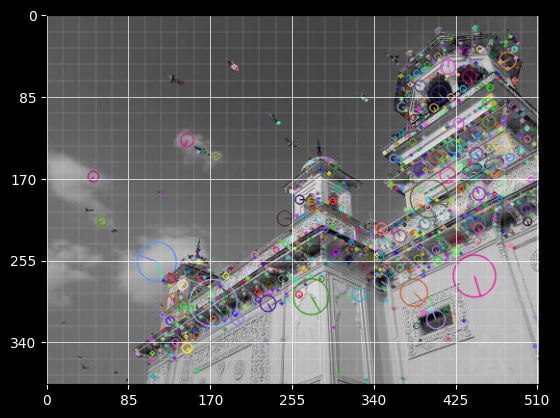

In [26]:
img = cv.drawKeypoints(gray, kp, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv.imwrite('img/sift_keypoints.jpg', img)
from img_processing import new_show_imx
new_show_imx(img)

Maintenant, pour calculer le descripteur, OpenCV fournit deux méthodes.
1. Puisque vous avez déjà trouvé des points clés, vous pouvez appeler `sift.compute()` qui calcule les descripteurs à partir des points clés que nous avons trouvés. Par exemple : `kp, des = sift.compute(gris, kp)`
2. Si vous n'avez pas trouvé de points clés, trouvez directement des points clés et des descripteurs en une seule étape avec la fonction `sift.detectAndCompute()`.

Nous verrons la deuxième méthode :

In [30]:
sift = cv.SIFT_create()
kp, des = sift.detectAndCompute(gray, None)

Ici, `kp` sera une liste de points clés et `des` sera un tableau numpy de forme (nombre de points clés) × 128.

Nous avons donc obtenu des points clés, des descripteurs, etc. Maintenant, nous voulons voir comment faire correspondre des points clés dans différentes images. Nous allons apprendre cela dans les prochains chapitres.

# 5. [Introduction à **SURF** (Caractéristiques robustes accélérées)](https://docs.opencv.org/3.4/df/dd2/tutorial_py_surf_intro.html)

## Objectif

Dans ce chapitre,
* Nous verrons les bases de SURF
* Nous verrons les fonctionnalités de SURF dans OpenCV

## Théorie

Dans le dernier chapitre, nous avons vu SIFT pour la détection et la description de points clés. Mais il était relativement lent et les gens avaient besoin d'une version accélérée. En 2006, Bay, H., Tuytelaars, T. et Van Gool, L ont publié un autre papier intitulé ["SURF: Speeded Up Robust Features"](https://people.ee.ethz.ch/~surf/eccv06.pdf) qui a introduit un nouvel algorithme appelé SURF. Comme son nom l'indique, il s'agit d'une version accélérée de SIFT.

Contrairement à SIFT qui approxime la Laplacienne de Gaussienne avec la Différence de Gaussienne pour trouver l'espace des échelles, SURF va plus loin en approximant LoG avec le filtre à boîte. Cette approximation peut facilement être calculée avec l'aide des images intégrales et peut être effectuée en parallèle pour différentes échelles. De plus, SURF se base sur le déterminant de la matrice de Hess pour la localisation et l'échelle.

<img src="https://docs.opencv.org/3.4/surf_boxfilter.jpg" alt="surf_boxfilter.jpg"/>

Pour l'attribution de l'orientation, SURF utilise les réponses à l'ondelette dans les directions horizontale et verticale pour un voisinage de taille $6\sigma$. Des poids gaussiens appropriés sont également appliqués. Ils sont ensuite tracés dans un espace comme indiqué dans l'image ci-dessous. L'orientation dominante est estimée en calculant la somme de toutes les réponses dans une fenêtre d'orientation coulissante d'un angle de 60 degrés. Ce qui est intéressant, c'est que la réponse à l'ondelette peut facilement être trouvée à l'aide des images intégrales à n'importe quelle échelle. Pour de nombreuses applications, l'invariance de rotation n'est pas nécessaire, il n'est donc pas nécessaire de trouver cette orientation, ce qui accélère le processus. SURF offre une telle fonctionnalité appelée Upright-SURF ou U-SURF. Il améliore la vitesse et reste robuste jusqu'à ±15∘. OpenCV prend en charge les deux en fonction du drapeau "upright". S'il est égal à 0, l'orientation est calculée. S'il est égal à 1, l'orientation n'est pas calculée et c'est plus rapide.

<img src="https://docs.opencv.org/3.4/surf_orientation.jpg" alt="surf_orientation.jpg"/>

Pour la description des caractéristiques, SURF utilise des réponses en ondelette dans les directions horizontale et verticale (encore une fois, l'utilisation d'images intégrales facilite les choses). Un voisinage de taille 20s X 20s est pris autour du point clé où $\sigma$ est la taille. Il est divisé en 4x4 sous-régions. Pour chaque sous-région, les réponses en ondelette horizontales et verticales sont prises et un vecteur est formé de cette façon, $v=\sum{d_x}, \sum{d_y}, \sum{|d_x|}, \sum{|d_y|}$. Cela donne, lorsqu'il est représenté sous forme de vecteur, le descripteur de caractéristiques SURF avec un total de 64 dimensions. Plus la dimension est faible, plus le temps de calcul et d'appariement est rapide, mais elle fournit une meilleure distinction des caractéristiques.

Pour plus de distinction, le descripteur de caractéristiques SURF a une version étendue de 128 dimensions. Les sommes de $d_x$ et $|d_x|$ sont calculées séparément pour $d_y \lt 0$ et $d_y \ge 0$. De manière similaire, les sommes de $d_y$ et $|d_y|$ sont divisées en fonction du signe de $d_x$, doublant ainsi le nombre de caractéristiques. Cela n'ajoute pas beaucoup de complexité de calcul. OpenCV prend en charge les deux en définissant la valeur du drapeau étendu avec 0 et 1 pour 64-dim et 128-dim respectivement (par défaut 128-dim).

Une autre amélioration importante est l'utilisation du signe du Laplacien (trace de la matrice Hessienne) pour le point d'intérêt sous-jacent. Cela n'ajoute pas de coût de calcul car il est déjà calculé pendant la détection. Le signe du Laplacien distingue les éclaboussures brillantes sur les fonds sombres de la situation inverse. Lors de l'étape d'appariement, nous ne comparons les caractéristiques que si elles ont le même type de contraste (comme montré dans l'image ci-dessous). Cette information minimale permet un appariement plus rapide, sans réduire les performances du descripteur.

<img src="https://docs.opencv.org/3.4/surf_matching.jpg" alt="surf_matching.jpg"/>

En résumé, SURF apporte de nombreuses améliorations pour accélérer chaque étape. Les analyses montrent qu'il est trois fois plus rapide que SIFT tout en offrant des performances comparables à SIFT. SURF est bon pour gérer les images floues et les rotations, mais pas pour gérer les changements de point de vue et les changements d'éclairage.

## SURF dans OpenCV

OpenCV propose des fonctionnalités SURF de la même manière que SIFT. Vous initiez un objet SURF avec certaines conditions facultatives comme les descripteurs de 64/128 dimensions, Upright/Normal SURF, etc. Tous les détails sont bien expliqués dans la documentation. Ensuite, comme nous l'avons fait pour SIFT, nous pouvons utiliser SURF.detect(), SURF.compute(), etc. pour trouver des points clés et des descripteurs.

Tout d'abord, nous allons voir un exemple simple sur comment trouver les points clés et les descripteurs SURF et les dessiner. Tous les exemples sont montrés dans le terminal Python car c'est la même chose que pour SIFT.

In [31]:
import cv2 as cv

img = cv.imread('img/fly.png', cv.IMREAD_GRAYSCALE)
# Create SURF object. You can specify params here or later.
# Here I set Hessian Threshold to 400
surf = cv.xfeatures2d.SURF_create(400)
# Find keypoints and descriptors directly
kp, des = surf.detectAndCompute(img, None)
len(kp)

"""
error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv_contrib\modules\xfeatures2d\src\surf.cpp:1028:
error: (-213:The function/feature is not implemented)
This algorithm is patented and is excluded in this configuration;
Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SURF::create'
"""

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv_contrib\modules\xfeatures2d\src\surf.cpp:1028: error: (-213:The function/feature is not implemented) This algorithm is patented and is excluded in this configuration; Set OPENCV_ENABLE_NONFREE CMake option and rebuild the library in function 'cv::xfeatures2d::SURF::create'


C'est moins que 50. Regardons-le sur l'image.

In [ ]:
import matplotlib.pyplot as plt
img2 = cv.drawKeypoints(img, kp, None, (255, 0, 0), 4)
plt.imshow(img2),plt.show()

Voyez le résultat ci-dessous. Vous pouvez voir que SURF ressemble plus à un détecteur de tache. Il détecte les taches blanches sur les ailes du papillon. Vous pouvez le tester avec d'autres images.

<img src="https://docs.opencv.org/3.4/surf_kp1.jpg" alt="surf_kp1.jpg"/>

Maintenant, je veux appliquer U-SURF, de sorte qu'il ne trouvera pas l'orientation.

In [ ]:
# Check upright flag, if it False, set it to True
print(surf.getUpright())
# False
surf.setUpright(True)
# Recompute the feature points and draw it
kp = surf.detect(img,None)
img2 = cv.drawKeypoints(img, kp, None, (255, 0, 0), 4)
plt.imshow(img2), plt.show()

Voyez les résultats ci-dessous. Toutes les orientations sont montrées dans la même direction. C'est plus rapide que précédemment. Si vous travaillez sur des cas où l'orientation n'est pas un problème (comme le collage de panorama), c'est mieux.

<img src="https://docs.opencv.org/3.4/surf_kp2.jpg" alt="surf_kp2.jpg"/>

Enfin, nous vérifions la taille du descripteur et la changeons en 128 s'il n'est que de 64 dimensions.

In [ ]:
# Find size of descriptor
print(surf.descriptorSize())
# 64
# That means flag, "extended" is False.
surf.getExtended()
# False
# So we make it to True to get 128-dim descriptors.
surf.setExtended(True)
kp, des = surf.detectAndCompute(img,None)
print( surf.descriptorSize() )
# 128
print( des.shape )
# (47, 128)

La partie restante est la correspondance, que nous ferons dans un autre chapitre.

## Ressources additionnelles

* https://en.wikipedia.org/wiki/Speeded_up_robust_features

# 6. [Algorithme **FAST** pour la détection de coins](https://docs.opencv.org/3.4/df/d0c/tutorial_py_fast.html)

## Objectif

Dans ce chapitre,
* nous comprendrons les bases de l'algorithme FAST
* et nous trouverons des coins en utilisant les fonctionnalités OpenCV pour l'algorithme FAST.

## Théorie

Nous avons vu plusieurs détecteurs de caractéristiques et beaucoup d'entre eux sont vraiment bons. Mais en regardant du point de vue d'une application en temps réel, ils ne sont pas assez rapides. Un exemple parfait serait un robot mobile SLAM (Simultaneous Localization and Mapping) qui a des ressources de calcul limitées.

En tant que solution à ce problème, l'algorithme FAST (Features from Accelerated Segment Test) a été proposé par Edward Rosten et Tom Drummond dans leur article "Machine learning for high-speed corner detection" en 2006 (révisé plus tard en 2010). Un résumé de base de l'algorithme est présenté ci-dessous. Reportez-vous à l'article original pour plus de détails (toutes les images sont prises de l'article original).

### Détection de fonctionnalité en utilisant FAST

1. Sélectionnez un pixel $p$ dans l'image qui doit être identifié comme un point d'intérêt ou non. Son intensité est $I_p$.
2. Sélectionnez une valeur seuil appropriée $t$.
3. Considérez un cercle de 16 pixels autour du pixel en test. (Voir l'image ci-dessous)

<img src="https://docs.opencv.org/3.4/fast_speedtest.jpg" alt="fast_speedtest.jpg"/>

4. Maintenant, le pixel $p$ est un coin s'il existe un ensemble de $n$ pixels adjacents dans le cercle (de 16 pixels) qui sont tous plus clairs que $I_p + t$, ou tous plus sombres que $I_p - t$. (Indiqué en tant que lignes de pointillés blanc dans l'image ci-dessus). $n$ a été choisi pour être 12.
5. Un **test rapide** a été proposé pour exclure un grand nombre de non-coins. Ce test examine uniquement les quatre pixels à 1, 9, 5 et 13 (le premier 1 et 9 sont testés s'ils sont trop plus clairs ou plus sombres. Si c'est le cas, il vérifie 5 et 13). Si $p$ est un coin, alors au moins trois d'entre eux doivent être tous plus clairs que $I_p + t$ ou plus sombres que $I_p - t$. Si aucun de ces cas n'est vrai, alors $p$ ne peut pas être un coin. Le critère complet de test de segment peut alors être appliqué aux candidats passés en examinant tous les pixels dans le cercle. Ce détecteur en soi présente une haute performance, mais il y a plusieurs faiblesses:
    * Il n'élimine pas autant de candidats pour $n < 12$.
    ù Le choix de pixels n'est pas optimal car son efficacité dépend de l'ordre des questions et de la distribution des apparitions de coins.
    * Les résultats des tests à haute vitesse sont abandonnés.
    * Plusieurs caractéristiques sont détectées adjacentes l'une à l'autre.

Les 3 premiers points sont abordés avec une approche d'apprentissage automatique. Le dernier est abordé en utilisant la suppression non-maximale.

### Détection de Coins avec Apprentissage Automatique

1. Sélectionnez un ensemble d'images pour l'netraînement (de préférence du domaine cible)
2. Exécutez l'algorithme FAST dans chaque image pour trouver des points de caractéristiques.
3. Pour chaque point de caractéristique, enregistrez les 16 pixels autour de celui-ci en tant que vecteur. Faites-le pour toutes les images pour obtenir le vecteur de caractéristiques $P$.
4. Chaque pixel (disons $x$) parmi ces 16 pixels peut avoir l'un des trois états suivants:

<mark>Remplacer par du LaTeX</mark>

<img src="https://docs.opencv.org/3.4/fast_eqns.jpg" alt="fast_eqns.jpg"/>

5. En fonction de ces états, le vecteur de caractéristiques $P$ est subdivisé en 3 sous-ensembles, $P_d$, $P_s$, $P_b$.
6. Définissez une nouvelle variable booléenne, $K_p$, qui est vraie si $p$ est un coin et fausse sinon.
7. Utilisez l'algorithme ID3 (classificateur d'arbre de décision) pour interroger chaque sous-ensemble en utilisant la variable $K_p$ pour les connaissances sur la vraie classe. Il sélectionne $x$ qui fournit le plus d'informations sur si le pixel candidat est un coin, mesuré par l'entropie de $K_p$.
8. Cela est récursivement appliqué à tous les sous-ensembles jusqu'à ce que son entropie soit nulle.
9. L'arbre de décision ainsi créé est utilisé pour une détection rapide dans d'autres images.

### Réduction non-maximale

Détecter plusieurs points d'intérêt à des emplacements adjacents est un autre problème. Il est résolu en utilisant la Réduction non-maximale.
1. Calculez une fonction de score, $V$, pour tous les points de caractéristiques détectés. $V$ est la somme de la différence absolue entre $p$ et les valeurs des 16 pixels environnants.
2. Considérez deux points clés adjacents et calculez leurs valeurs $V$.
3. Supprimez celui ayant la valeur $V$ la plus basse.

### Résumé

Il est plusieurs fois plus rapide que d'autres détecteurs de coins existants.

Mais il n'est pas robuste face à des niveaux élevés de bruit. Il dépend d'un seuil.

## Le détecteur de caractéristiques FAST dans OpenCV

Il est appelé comme n'importe quel autre détecteur de caractéristiques dans OpenCV. Si vous le souhaitez, vous pouvez spécifier le seuil, si la suppression non maximale doit être appliquée ou non, le voisinage à utiliser, etc.

Pour le voisinage, trois drapeaux sont définis, `cv.FAST_FEATURE_DETECTOR_TYPE_5_8`, `cv.FAST_FEATURE_DETECTOR_TYPE_7_12` et `cv.FAST_FEATURE_DETECTOR_TYPE_9_16`. Ci-dessous se trouve un code simple sur la façon de détecter et de dessiner les points de caractéristiques FAST.

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('img/blox.jpg', cv.IMREAD_GRAYSCALE) # `<opencv_root>/samples/data/blox.jpg`
# Initiate FAST object with default values
fast = cv.FastFeatureDetector_create()
# find and draw the keypoints
kp = fast.detect(img,None)
img2 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
# Print all default params
print( "Threshold: {}".format(fast.getThreshold()) )
print( "nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print( "neighborhood: {}".format(fast.getType()) )
print( "Total Keypoints with nonmaxSuppression: {}".format(len(kp)) )
cv.imwrite('img/fast_true.png', img2)
# Disable nonmaxSuppression
fast.setNonmaxSuppression(0)
kp = fast.detect(img, None)
print( "Total Keypoints without nonmaxSuppression: {}".format(len(kp)) )
img3 = cv.drawKeypoints(img, kp, None, color=(255,0,0))
cv.imwrite('img/fast_false.png', img3)

Threshold: 10
nonmaxSuppression:True
neighborhood: 2
Total Keypoints with nonmaxSuppression: 431
Total Keypoints without nonmaxSuppression: 1575


True

## Ressources supplémentaires

1. Edward Rosten et Tom Drummond, "Machine learning for high speed corner detection" lors de la 9ème Conférence européenne sur la vision par ordinateur, vol. 1, 2006, pp. 430-443.
2. Edward Rosten, Reid Porter et Tom Drummond, "Faster and better: a machine learning approach to corner detection" dans IEEE Trans. Analyse de motifs et intelligence artificielle, 2010, vol 32, pp. 105-119.
* https://en.wikipedia.org/wiki/Features_from_accelerated_segment_test

# 7. [L'algorithme **BRIEF** (Binary Robust Independent Elementary Features)](https://docs.opencv.org/3.4/dc/d7d/tutorial_py_brief.html)

## Objectif

Dans ce chapitre, nous verrons les bases de l'algorithme BRIEF.

## Théorie

Nous savons que SIFT utilise un vecteur de 128 dimensions pour les descripteurs. Étant donné qu'il utilise des nombres à virgule flottante, cela prend en gros 512 octets. De manière similaire, SURF prend également au minimum 256 octets (pour 64 dimensions). La création d'un tel vecteur pour des milliers de caractéristiques prend beaucoup de mémoire, ce qui n'est pas réalisable pour les applications à contraintes de ressources, en particulier pour les systèmes embarqués. Plus la mémoire est grande, plus le temps nécessaire pour la correspondance est long.

Cependant, toutes ces dimensions ne peuvent pas être nécessaires pour la correspondance réelle. Nous pouvons la compresser à l'aide de plusieurs méthodes telles que PCA, LDA, etc. Même d'autres méthodes telles que le hachage à l'aide de LSH (Locality Sensitive Hashing) sont utilisées pour convertir ces descripteurs SIFT en chaînes binaires. Ces chaînes binaires sont utilisées pour correspondre aux caractéristiques en utilisant la distance de Hamming. Cela apporte une accélération car trouver la distance de Hamming consiste simplement à appliquer XOR et à compter les bits, ce qui est très rapide sur les CPU modernes avec des instructions SSE. Mais ici, nous devons trouver les descripteurs d'abord, puis nous pouvons appliquer le hachage, ce qui ne résout pas notre problème initial de mémoire.

L'algorithme BRIEF intervient à ce moment-là. Il propose un raccourci pour trouver directement les chaînes binaires sans trouver les descripteurs. Il prend un patch d'image lissé et sélectionne un ensemble de paires de $n_d$ positions $(x, y)$ uniques (expliquées dans le papier). Ensuite, certaines comparaisons d'intensité de pixel sont effectuées sur ces paires de positions. Par exemple, si la première paire de positions est $p$ et $q$, et si $I(p) < I(q)$, le résultat est 1, sinon il est 0. Cela est appliqué à toutes les $n_d$ paires de positions pour obtenir une chaîne de bits en $n_d$ dimensions.

Ce $n_d$ peut être 128, 256 ou 512. OpenCV les prend en charge tous, mais par défaut, ce sera 256 (OpenCV le représente en octets. Les valeurs seront donc 16, 32 et 64). Une fois que vous l'obtenez, vous pouvez utiliser la distance de Hamming pour faire correspondre ces descripteurs.

Un point important est que BRIEF est un descripteur de caractéristiques, il ne fournit aucune méthode pour trouver les caractéristiques. Vous devrez donc utiliser un autre détecteur de caractéristiques, comme SIFT, SURF, etc. Le papier recommande d'utiliser CenSurE qui est un détecteur rapide et BRIEF fonctionne même légèrement mieux pour les points CenSurE que pour les points SURF.

En résumé, BRIEF est une méthode plus rapide de calcul de descripteurs de caractéristiques et de correspondance. Il fournit également un taux de reconnaissance élevé à moins qu'il n'y ait une rotation importante dans le plan.

## STAR (CenSurE) dans OpenCV

STAR est un détecteur de caractéristiques dérivé de CenSurE. Contrairement à CenSurE cependant, qui utilise des polygones tels que des carrés, des hexagones et des octagones pour approcher un cercle, Star émule un cercle avec 2 carrés se chevauchant : 1 debout et 1 incliné de 45 degrés. Ces polygones sont binaires. Ils peuvent être considérés comme des polygones avec des bords épais. Les bords et la zone enfermée ont des poids de signes opposés. Cela a de meilleures caractéristiques de calcul que d'autres détecteurs d'espace d'échelle et il est capable de mise en œuvre en temps réel. Contrairement à SIFT et SURF, qui trouvent des extrema sur des pixels sous-échantillonnés qui compromettent la précision à des échelles plus grandes, CenSurE crée un vecteur de caractéristiques en utilisant une résolution spatiale complète à toutes les échelles dans la pyramide.

## BRIEF dans OpenCV

Le code ci-dessous montre le calcul de descripteurs BRIEF avec l'aide du détecteur CenSurE.

notez que vous avez besoin d'[opencv contrib](https://github.com/opencv/opencv_contrib) pour utiliser cela.

In [3]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('img/simple.jpg', cv.IMREAD_GRAYSCALE)
# Initiate FAST detector
star = cv.xfeatures2d.StarDetector_create()
# Initiate BRIEF extractor
brief = cv.xfeatures2d.BriefDescriptorExtractor_create()
# find the keypoints with STAR
kp = star.detect(img,None)
# compute the descriptors with BRIEF
kp, des = brief.compute(img, kp)
print(brief.descriptorSize())
print(des.shape)

32


AttributeError: 'NoneType' object has no attribute 'shape'

La fonction `brief.getDescriptorSize()` donne la taille nd utilisée en octets. Par défaut, il est de 32. Le suivant est le processus de correspondance, qui sera effectué dans un autre chapitre.

## Ressources supplémentaires

1. Michael Calonder, Vincent Lepetit, Christoph Strecha et Pascal Fua, "BRIEF : Binary Robust Independent Elementary Features", 11ème Conférence Européenne sur la Vision par Ordinateur (ECCV), Héraklion, Crète. LNCS Springer, septembre 2010.

2. [LSH (Locality Sensitive Hashing)](https://en.wikipedia.org/wiki/Locality-sensitive_hashing) sur wikipedia.


# 8. [**ORB (Oriented FAST et Rotated BRIEF)**](https://docs.opencv.org/3.4/dc/d7d/tutorial_py_brief.html)

## Objectif

Dans ce chapitre, nous verrons les bases de ORB.

## Théorie

En tant qu'enthusiaste d'OpenCV, la chose la plus importante à propos de ORB est qu'elle provient de "OpenCV Labs". Cet algorithme a été proposé par Ethan Rublee, Vincent Rabaud, Kurt Konolige et Gary R. Bradski dans leur papier ORB: une alternative efficace à SIFT ou SURF en 2011. Comme le dit le titre, c'est une bonne alternative à SIFT et SURF en termes de coût de calcul, de performance de correspondance et surtout des brevets. Oui, SIFT et SURF sont brevetés et vous êtes censé les payer pour leur utilisation. Mais ORB ne l'est pas!!!

ORB est en quelque sorte une fusion du détecteur de points clés FAST et du descripteur BRIEF avec de nombreuses modifications pour améliorer les performances. Tout d'abord, il utilise FAST pour trouver les points clés, puis utilise la mesure des coins Harris pour trouver les N points les plus importants parmi eux. Il utilise également une pyramide pour produire des caractéristiques multirésolution. Mais un problème est que FAST ne calcule pas l'orientation. Alors, que se passe-t-il pour l'invariance de rotation? Les auteurs ont trouvé la modification suivante.

Il calcule le centroïde pondéré par l'intensité du patch avec le coin situé au centre. La direction du vecteur depuis ce point de coin vers le centroïde donne l'orientation. Pour améliorer l'invariance de rotation, les moments sont calculés avec x et y qui doivent être dans une région circulaire de rayon $r$, où $r$ est la taille du patch.

Maintenant, pour les descripteurs, ORB utilise les descripteurs BRIEF. Mais nous avons déjà vu que BRIEF se comporte mal avec la rotation. Alors, ce que fait ORB, c'est "diriger" BRIEF selon l'orientation des points clés. Pour tout jeu de caractéristiques de $n$ tests binaires à l'emplacement $(x_i, y_i)$, définir une matrice $2×n$, $S$ qui contient les coordonnées de ces pixels. Puis, en utilisant l'orientation du patch, $\theta$, sa matrice de rotation est trouvée et tourne $S$ pour obtenir la version dirigée (tournée) $S_\theta$.

ORB discrétise l'angle en incréments de $2\pi/30$ (12 degrés) et construit une table de recherche de modèles BRIEF précalculés. Aussi longtemps que l'orientation du point clé $\theta$ est cohérente à travers les vues, le jeu correct de points $S_\theta$ sera utilisé pour calculer son descripteur.

BRIEF a une propriété importante où chaque bit de caractéristique a une grande variance et une moyenne proche de 0,5. Mais une fois orienté selon la direction du point clé, il perd cette propriété et devient plus distribué. Une variance élevée rend une caractéristique plus discriminante, car elle répond différemment aux entrées. Une autre propriété souhaitable est d'avoir des tests sans corrélation, car alors chaque test contribuera au résultat. Pour résoudre tout cela, ORB effectue une recherche gloutonne parmi tous les tests binaires possibles pour trouver ceux qui ont à la fois une variance élevée et une moyenne proche de 0,5, ainsi qu'une absence de corrélation. Le résultat est appelé **rBRIEF**.

Pour le matching de descripteur, on utilise LSH à plusieurs sondes, qui améliore le LSH traditionnel. Le papier dit qu'ORB est beaucoup plus rapide que SURF et SIFT et que le descripteur ORB fonctionne mieux que SURF. ORB est un bon choix pour les appareils à faible consommation pour la réalisation de panoramas, etc.

## ORB dans OpenCV

Comme d'habitude, nous devons créer un objet ORB avec la fonction `cv.ORB()` ou en utilisant l'interface commune de `feature2d`. Il a un certain nombre de paramètres optionnels. Les plus utiles sont `nFeatures` qui représente le nombre maximum de caractéristiques à conserver (par défaut 500), `scoreType` qui indique si le score Harris ou le score FAST est utilisé pour classer les caractéristiques (par défaut, le score Harris), etc. Un autre paramètre, `WTA_K`, décide du nombre de points qui produisent chaque élément du descripteur BRIEF orienté. Il est à 2 par défaut, c'est-à-dire qu'il sélectionne deux points à la fois. Dans ce cas, pour le matching, la distance `NORM_HAMMING` est utilisée. Si `WTA_K` est à 3 ou à 4, ce qui prend 3 ou 4 points pour produire le descripteur BRIEF, la distance de matching est définie par `NORM_HAMMING2`.

Ci-dessous se trouve un simple code qui montre l'utilisation d'ORB.

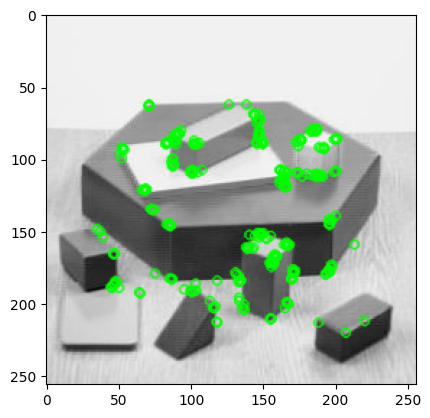

(<matplotlib.image.AxesImage at 0x1e52503bd60>, None)

In [5]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('img/blox.jpg', cv.IMREAD_GRAYSCALE)   # 'simple.jpg'
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img, None)
# compute the descriptors with ORB
kp, des = orb.compute(img, kp)
# draw only keypoints location,not size and orientation
img2 = cv.drawKeypoints(img, kp, None, color=(0, 255, 0), flags=0)
plt.imshow(img2), plt.show()

## Resources complémentaires

1. Ethan Rublee, Vincent Rabaud, Kurt Konolige, Gary R. Bradski: ORB: An efficient alternative to SIFT or SURF. ICCV 2011: 2564-2571.

# 9. [**Correspondance** de caractéristiques](https://docs.opencv.org/3.4/dc/dc3/tutorial_py_matcher.html)

## Objectif

Dans ce chapitre
* Nous verrons comment faire correspondre les caractéristiques dans une image avec d'autres.
* Nous utiliserons le matcheur Brute-Force et le matcheur FLANN dans OpenCV

## Basiques du matcheur Brute-Force

Le matcheur Brute-Force est simple. Il prend le descripteur d'une caractéristique dans le premier ensemble et le correspond à toutes les autres caractéristiques dans le second ensemble en utilisant un calcul de distance. Et le plus proche est retourné.

Pour le matcheur BF, nous devons d'abord créer l'objet BFMatcher à l'aide de [cv.BFMatcher()](https://docs.opencv.org/3.4/d3/da1/classcv_1_1BFMatcher.html). Cela prend deux paramètres facultatifs. Le premier est `normType`. Il spécifie la mesure de distance à utiliser. Par défaut, c'est [cv.NORM_L2](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ggad12cefbcb5291cf958a85b4b67b6149fa7bacbe84d400336a8f26297d8e80e3a2). C'est bon pour SIFT, SURF, etc. ([cv.NORM_L1](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ggad12cefbcb5291cf958a85b4b67b6149fab55c78ff204a979026c026ea19de65c9) est également là). Pour les descripteurs basés sur des chaînes binaires comme ORB, BRIEF, BRISK, etc., [cv.NORM_HAMMING](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ggad12cefbcb5291cf958a85b4b67b6149fa4b063afd04aebb8dd07085a1207da727) devrait être utilisé, qui utilise la distance de Hamming comme mesure. Si ORB utilise WTA_K == 3 ou 4, [cv.NORM_HAMMING2](https://docs.opencv.org/3.4/d2/de8/group__core__array.html#ggad12cefbcb5291cf958a85b4b67b6149fa7fab9cda83e79380cd273c49de8e3231) doit être utilisé.

Le second paramètre est une variable booléenne, `crossCheck` qui est `false` par défaut. Si c'est vrai, le matcheur retourne seulement ces correspondances avec la valeur (i, j) telle que le i-ème descripteur dans l'ensemble A a le j-ème descripteur dans l'ensemble B comme meilleur correspondance et vice versa. C'est-à-dire que les deux caractéristiques dans les deux ensembles doivent se correspondre. Cela fournit un résultat cohérent et est une bonne alternative au test de rapport proposé par D.Lowe dans le papier SIFT.

Une fois créé, deux méthodes importantes sont `BFMatcher.match()` et `BFMatcher.knnMatch()`. La première retourne la meilleure correspondance. La seconde méthode retourne k meilleures correspondances où k est spécifié par l'utilisateur. Cela peut être utile lorsque nous devons effectuer un travail supplémentaire sur cela.

Comme nous avons utilisé `cv.drawKeypoints()` pour dessiner des points clés, `cv.drawMatches()` nous aide à dessiner les correspondances. Il assemble deux images horizontalement et dessine des lignes de la première image à la seconde image montrant les meilleures correspondances. Il y a aussi `cv.drawMatchesKnn` qui dessine toutes les k meilleures correspondances. Si k = 2, il dessinera deux lignes de correspondance pour chaque point clé. Nous devons donc fournir un masque si nous voulons le dessiner de manière sélective.

Examinons un exemple pour chacun de SIFT et ORB (utilisant tous deux des mesures de distance différentes).
Brute-Force Matching avec des descripteurs ORB

Ici, nous verrons un exemple simple sur la façon de faire correspondre les caractéristiques entre deux images. Dans ce cas, j'ai une image de requête et une image d'entraînement. Nous allons essayer de trouver l'image de requête dans l'image d'entraînement en utilisant le matching des caractéristiques. (Les images sont /samples/data/box.png et /samples/data/box_in_scene.png)

Nous utilisons des descripteurs ORB pour faire correspondre les caractéristiques. Commençons donc par charger les images, trouver les descripteurs, etc.

In [9]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('img/box.png',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('img/box_in_scene.png',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)

Ensuite, nous créons un objet `BFMatcher` avec la mesure de distance `cv.NORM_HAMMING` (étant donné que nous utilisons ORB) et crossCheck est activé pour obtenir de meilleurs résultats. Ensuite, nous utilisons la méthode Matcher.match() pour obtenir les meilleures correspondances dans deux images. Nous les trions dans l'ordre croissant de leurs distances pour que les meilleures correspondances (avec une faible distance) se retrouvent en premier. Ensuite, nous ne dessinons que les 10 premières correspondances (juste pour la visibilité. Vous pouvez l'augmenter selon vos besoins).

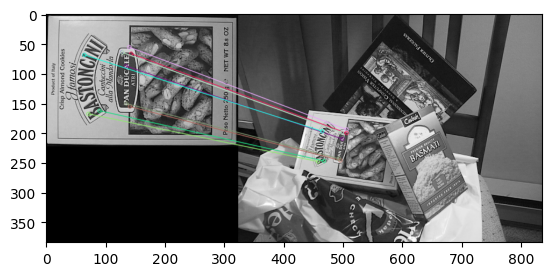

(<matplotlib.image.AxesImage at 0x1e52c7bf7c0>, None)

In [10]:
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.imshow(img3),plt.show()

### Que signifie l'objet `Matcher` ?

La ligne `"matches = bf.match(des1, des2)"` donne une liste d'objets `DMatch`. Cet objet `DMatch` a les attributs suivants :
* `DMatch.distance` - Distance entre les descripteurs. Plus la distance est faible, mieux c'est.
* `DMatch.trainIdx` - Index du descripteur dans les descripteurs d'entraînement
* `DMatch.queryIdx` - Index du descripteur dans les descripteurs de requête
* `DMatch.imgIdx` - Index de l'image d'entraînement.

### Matching force brute avec des descripteurs SIFT et test de ratio

Cette fois, nous utiliserons `BFMatcher.knnMatch()` pour obtenir les k meilleures correspondances. Dans cet exemple, nous prendrons `k=2` pour pouvoir appliquer le test de ratio expliqué par D.Lowe dans son article.

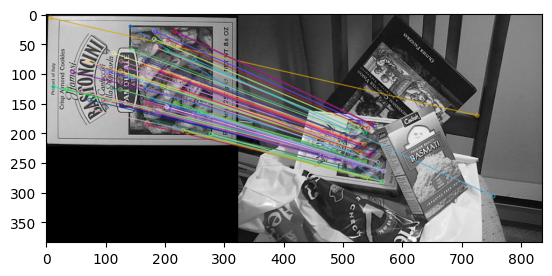

In [12]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('img/box.png', cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('img/box_in_scene.png', cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(
    img1, kp1,
    img2, kp2,
    good,
    None,
    flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)
plt.imshow(img3)
plt.show()

## Matcher basé sur FLANN

FLANN signifie Fast Library for Approximate Nearest Neighbors (Bibliothèque rapide pour les plus proches voisins approchés). Il contient une collection d'algorithmes optimisés pour la recherche rapide des plus proches voisins dans de grands ensembles de données et pour des caractéristiques à haute dimension. Il fonctionne plus rapidement que `BFMatcher` pour les grands ensembles de données. Nous verrons le deuxième exemple avec un matcheur basé sur FLANN.

Pour le matcheur basé sur FLANN, nous devons passer deux dictionnaires qui spécifient l'algorithme à utiliser, ses paramètres associés, etc. Le premier est `IndexParams`. Pour les différents algorithmes, les informations à transmettre sont expliquées dans les docs FLANN. En résumé, pour des algorithmes tels que SIFT, SURF, etc., vous pouvez transmettre ce qui suit :

In [13]:
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)

Lors de l'utilisation d'ORB, vous pouvez passer ce qui suit. Les valeurs commentées sont recommandées selon les docs, mais elles n'ont pas donné les résultats requis dans certains cas. Les autres valeurs ont fonctionné correctement :

In [14]:
FLANN_INDEX_LSH = 6
index_params = dict(
    algorithm=FLANN_INDEX_LSH,
    table_number=6,  # 12
    key_size=12,  # 20
    multi_probe_level=1  #2
)

Le deuxième dictionnaire est `SearchParams`. Il spécifie le nombre de fois que les arbres dans l'index doivent être parcourus de manière récursive. Des valeurs plus élevées donnent une meilleure précision, mais prennent également plus de temps. Si vous voulez changer la valeur, passez `search_params = dict(checks=100)`.

Avec ces informations, nous sommes prêts à y aller.

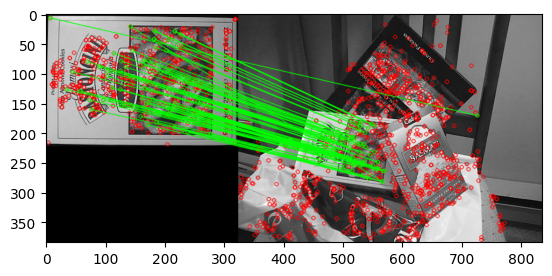

In [15]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
img1 = cv.imread('img/box.png', cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('img/box_in_scene.png', cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)
# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)   # or pass empty dictionary
flann = cv.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(des1, des2, k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
# ratio test as per Lowe's paper
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i] = [1, 0]
draw_params = dict(
    matchColor=(0, 255, 0),
    singlePointColor=(255, 0, 0),
    matchesMask=matchesMask,
    flags=cv.DrawMatchesFlags_DEFAULT
)
img3 = cv.drawMatchesKnn(
    img1, kp1,
    img2, kp2,
    matches,
    None,
    **draw_params
)
plt.imshow(img3)
plt.show()

## Ressources complémentaires

* [FAST APPROXIMATE NEAREST NEIGHBORS WITH AUTOMATIC ALGORITHM CONFIGURATION](https://www.cs.ubc.ca/~lowe/papers/09muja.pdf)
* https://www.fit.vutbr.cz/~ibarina/pub/VGE/reading/flann_manual-1.6.pdf
* Nombreuses implémentations de FLANN

# 10. [Correspondance de caractéristiques + **Homographie** pour trouver des objets](https://docs.opencv.org/3.4/d1/de0/tutorial_py_feature_homography.html)

## Objectif

Dans ce chapitre, nous allons combiner la correspondance de caractéristiques et la fonction `findHomographie` du module `calib3d` pour trouver des objets connus dans une image complexe.

## Bases

Alors, qu'avons-nous fait lors de la dernière session ? Nous avons utilisé une image de requête `queryImage`, trouvé certains points de caractéristiques dans celle-ci, nous avons pris une autre image d'entraînement `trainImage`, trouvé les caractéristiques de cette image également et nous avons trouvé les meilleures correspondances centre celles-ci. En bref, nous avons trouvé les emplacements de certaines parties d'un objet dans une autre image encombrée. Cette information est suffisante pour trouver exactement l'objet sur l'image d'entraînement.

Pour cela, nous pouvons utiliser une fonction du module `calib3d`, à savoir `cv.findHomography()`. Si nous passons l'ensemble des points des deux images, il trouvera la transformation de perspective de cet objet. Ensuite, nous pouvons utiliser `cv.perspectiveTransform()` pour trouver l'objet. Il a besoin d'au moins quatre points corrects pour trouver la transformation.

Nous avons vu qu'il peut y avoir des erreurs lors de l'appariement qui peuvent affecter le résultat. Pour résoudre ce problème, l'algorithme utilise RANSAC ou LEAST_MEDIAN (ce qui peut être décidé par les drapeaux). Ainsi, les bonnes correspondances qui fournissent une estimation correcte sont appelées des inliers et les autres sont appelées des outliers. `cv.findHomography()` retourne un masque qui spécifie les points d'inliers et d'outliers.

Alors, faisons-le !!!

## Code

Tout d'abord, comme d'habitude, trouvons les caractéristiques SIFT dans les images et appliquons le test de rapport pour trouver les meilleures correspondances.

In [16]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
MIN_MATCH_COUNT = 10
img1 = cv.imread('img/box.png', cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('img/box_in_scene.png', cv.IMREAD_GRAYSCALE) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks = 50)
flann = cv.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m, n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

Maintenant, nous fixons une condition selon laquelle il doit y avoir au moins 10 correspondances (définies par `MIN_MATCH_COUNT`) pour trouver l'objet. Sinon, afficher simplement un message disant qu'il n'y a pas suffisamment de correspondances.

Si suffisamment de correspondances sont trouvées, nous extrayons les emplacements des points clés correspondants dans les deux images. Ils sont passés pour trouver la transformation de perspective. Une fois que nous obtenons cette matrice de transformation 3x3, nous l'utilisons pour transformer les coins de l'image de requête `queryImage` en points correspondants dans l'image d'entraînement `trainImage`. Puis nous la dessinons.

In [17]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()
    h,w = img1.shape
    pts = np.float32([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]]).reshape(-1, 1, 2)
    dst = cv.perspectiveTransform(pts, M)
    img2 = cv.polylines(img2, [np.int32(dst)], True, 255, 3, cv.LINE_AA)
else:
    print(f"Not enough matches are found - {len(good)}/{MIN_MATCH_COUNT}")
    matchesMask = None

Enfin, nous dessinons nos points internes (si nous avons réussi à trouver l'objet) ou des points clés de correspondance (si nous avons échoué).

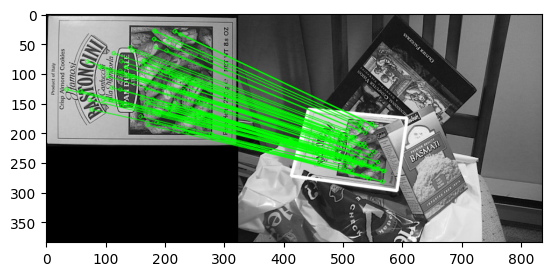

In [18]:
draw_params = dict(
    matchColor=(0, 255, 0), # draw matches in green color
    singlePointColor=None,
    matchesMask=matchesMask, # draw only inliers
    flags=2)
img3 = cv.drawMatches(
    img1, kp1,
    img2, kp2,
    good,
    None,
    **draw_params
)
plt.imshow(img3, 'gray')
plt.show()